In [196]:
class Analysis:
    def all_methods(self):
        return [method for method in dir(self) if callable(getattr(self, method))]
    def __init__(self):
        files=self.extract_file_names()
        self.csv_filename=self.csv_files(files)
        print(self.csv_filename)
    def extract_file_names(self):
        folder_path='E:\STACKER BEE\Agri project\Madhya Pradesh Data'  # Replace this with the path to your folder
        file_format='.csv'
        import os
        files = []
        for filename in os.listdir(folder_path):
            if filename.endswith(file_format):
                files.append(filename)
        return files
    def first_cleaning(self, csv_file):
        import pandas as pd
        df = self.data_load(csv_file)
        df = self.drop_state(df)
        df = self.date_conversion(df)
        df = self.Tonnes_conversion(df)
        df = self.Quintal_conversion_arrivals(df)
        cleaned_filename = csv_file.rsplit('.', 1)[0] + '_cleaned.csv'  # Extracting the filename without extension and adding '_cleaned.csv'
        df.to_csv(cleaned_filename)
        
    def csv_files(self,csv_filenames):
        loaded_data = {}
        for csv_filename in csv_filenames:
            # Extract the variable name from the filename
            name = csv_filename.split('.')[0].split('_')[-1]
            # Load CSV into DataFrame and save it into a variable with the extracted name
            loaded_data[name] = csv_filename
        return loaded_data
    def data_load(self,csv_file):
        import pandas as pd
        import numpy as np
        #header is in the first row, skip it when reading the CSV
        df=pd.read_csv(csv_file,skiprows=[0])
        return df
    def drop_state(self,df):
        df=df.drop('State Name',axis=1)
        return df
    def date_conversion(self,df):
        import pandas as pd
        import numpy as np
        df['Reported Date']=pd.to_datetime(df['Reported Date'],format="%d-%b-%y")
        return df
    def Tonnes_conversion(self,df):
        import pandas as pd
        import numpy as np
        if df['Arrivals (Tonnes)'].dtype=='O':
            df['Arrivals (Tonnes)']=df['Arrivals (Tonnes)'].str.replace(",","").astype(float)
        return df
    def Quintal_conversion_arrivals(self,df):
        import pandas as pd
        import numpy as np
        df['Arrivals (Quintals)']=df['Arrivals (Tonnes)']*10
        return df
    def plot_outlier(self,column_data,column):
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.boxplot(column_data)
        plt.title(f'Outliers of {column}')
        plt.show()
    def plot_distribution(self,column_data,column):
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.distplot(column_data)
        plt.title(f'Distribution of {column}')
        plt.show()

In [59]:
# Extracting xls file names:
folder_path = 'E:\STACKER BEE\Agri project\Madhya Pradesh Data'  # Replace this with the path to your folder
file_format='.xls'
xls_filenames = First.extract_filenames(folder_path,file_format)
print("XLS filenames in the folder:")
xls_filenames

XLS filenames in the folder:


['Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.xls',
 'Agmarknet_Price_And_Arrival_Report_Ajwan.xls',
 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.xls',
 'Agmarknet_Price_And_Arrival_Report_Alsandikai.xls',
 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.xls',
 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.xls',
 'Agmarknet_Price_And_Arrival_Report_Amranthus.xls',
 'Agmarknet_Price_And_Arrival_Report_Antawala.xls',
 'Agmarknet_Price_And_Arrival_Report_Apple.xls',
 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.xls',
 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.xls',
 'Agmarknet_Price_And_Arrival_Report_Banana Green.xls',
 'Agmarknet_Price_And_Arrival_Report_Banana.xls',
 'Agmarknet_Price_And_Arrival_Report_Beans.xls',
 'Agmarknet_Price_And_Arrival_Report_Beaten Rice.xls',
 'Agmarknet_Price_And_Arrival_Report_Beetroot.xls',
 'Agmarknet_Price_And_Arrival_Report_Bengal Gram Dal-Chana Dal.xls',
 'Agmarknet_Price_And_Arrival_Report_Ber-Zizyphu

In [60]:
len(xls_filenames)#all files are extracted

36

In [61]:
#manually converted the xls file into csv
#checking the all files are converted or not
csv_format='.csv'
csv_filenames=First.extract_filenames(folder_path,csv_format)
csv_filenames

['Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv',
 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv',
 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv',
 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv',
 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv',
 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv',
 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv',
 'Agmarknet_Price_And_Arrival_Report_Antawala.csv',
 'Agmarknet_Price_And_Arrival_Report_Apple.csv',
 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv',
 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv',
 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv',
 'Agmarknet_Price_And_Arrival_Report_Banana.csv',
 'Agmarknet_Price_And_Arrival_Report_Beans.csv',
 'Agmarknet_Price_And_Arrival_Report_Beaten Rice.csv',
 'Agmarknet_Price_And_Arrival_Report_Beetroot.csv',
 'Agmarknet_Price_And_Arrival_Report_Bengal Gram Dal-Chana Dal.csv',
 'Agmarknet_Price_And_Arrival_Report_Ber-Zizyphu

In [25]:
len(csv_filenames)#all the files are extracted and converted into csv file

36

In [64]:
data_crops=First.load_csv_files(csv_filenames)

In [65]:
data_crops

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv',
 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv',
 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv',
 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv',
 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv',
 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv',
 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv',
 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv',
 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv',
 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv',
 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv',
 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv',
 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv',
 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv',
 'Beaten

### Ahar_Dal_Tur_Dal

In [46]:
First=Analysis()#creating object

In [52]:
First.all_methods()

['Quintal_conversion_arrivals',
 'Tonnes_conversion',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'all_methods',
 'data_load',
 'date_convertion',
 'drop_state',
 'extract_filenames',
 'load_csv_files',
 'plot_distribution',
 'plot_outlier']

In [56]:
Ahar_Dal_Tur_Dal=First.data_load('Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv')

In [63]:
Ahar_Dal_Tur_Dal.head()

District Name Market Name         Variety   Group  Arrivals (Tonnes)  \
0    Chhindwara     Amarwda  Arhar Dal(Tur)  Pulses                2.5   
1    Chhindwara     Amarwda  Arhar Dal(Tur)  Pulses                0.5   
2    Chhindwara     Amarwda  Arhar Dal(Tur)  Pulses                8.0   
3    Chhindwara     Amarwda  Arhar Dal(Tur)  Pulses                2.5   
4    Chhindwara     Amarwda  Arhar Dal(Tur)  Pulses                9.0   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     4000                     4000   
1                     8000                     8000   
2                     8000                     8200   
3                     6000                     6500   
4                     6500                     7000   

   Modal Price (Rs./Quintal) Reported Date  Arrivals (Quintals)  
0                     4000.0    2023-10-18                 25.0  
1                     8000.0    2023-07-17                  5.0  
2                     8100.0    2023-07-16                 80.0  
3                     6250.0    2023-05-16                 25.0  
4                     6550.0    2023-03-22                 90.0

In [58]:
Ahar_Dal_Tur_Dal=First.drop_state(Ahar_Dal_Tur_Dal)

In [59]:
Ahar_Dal_Tur_Dal=First.date_convertion(Ahar_Dal_Tur_Dal)

In [60]:
Ahar_Dal_Tur_Dal=First.Tonnes_conversion(Ahar_Dal_Tur_Dal)

In [61]:
Ahar_Dal_Tur_Dal=First.Quintal_conversion_arrivals(Ahar_Dal_Tur_Dal)

In [62]:
Ahar_Dal_Tur_Dal['Reported Date'].dtype

dtype('<M8[ns]')

Arrivals (Tonnes)


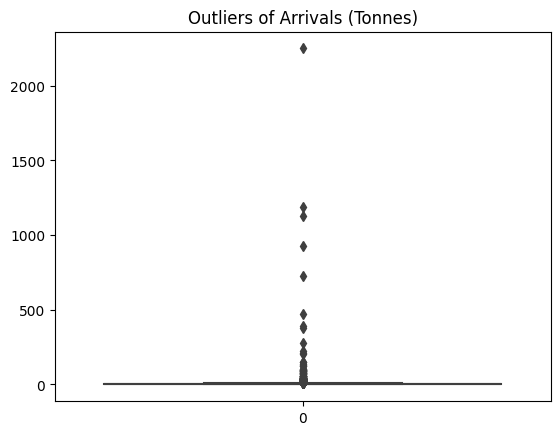

Min Price (Rs./Quintal)


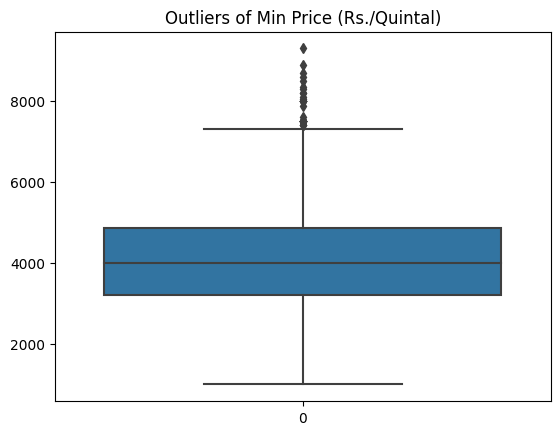

Max Price (Rs./Quintal)


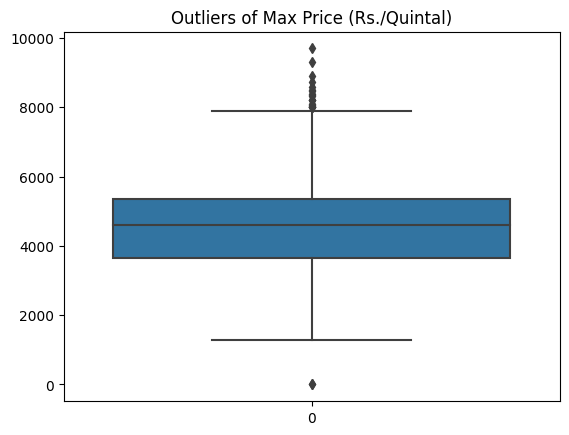

Modal Price (Rs./Quintal)


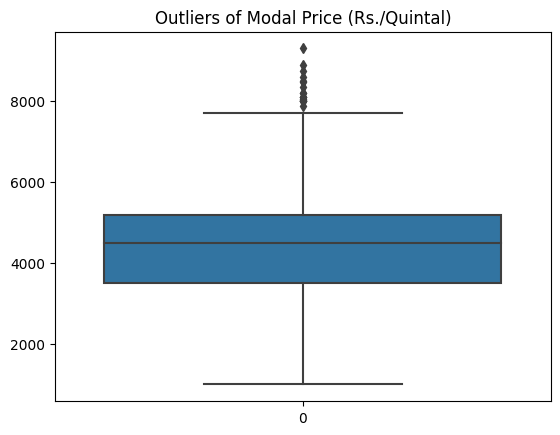

Arrivals (Quintals)


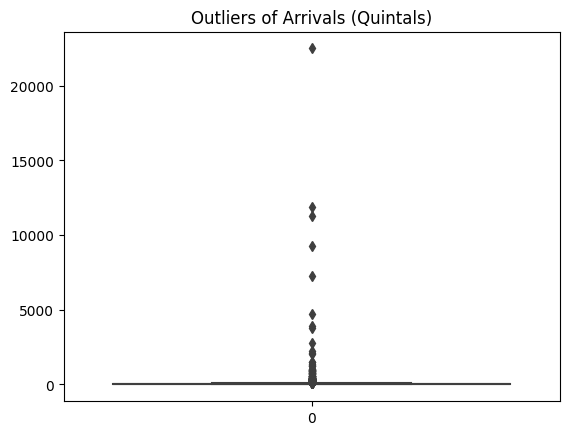

In [112]:
for column in Ahar_Dal_Tur_Dal.columns:
    if Ahar_Dal_Tur_Dal[column].dtype!='object' and Ahar_Dal_Tur_Dal[column].dtype!='<M8[ns]':
        print(column)
        First.plot_outlier(Ahar_Dal_Tur_Dal[column],column)

Arrivals (Tonnes)


C:\Users\aksha\AppData\Local\Temp\ipykernel_31724\4253890278.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


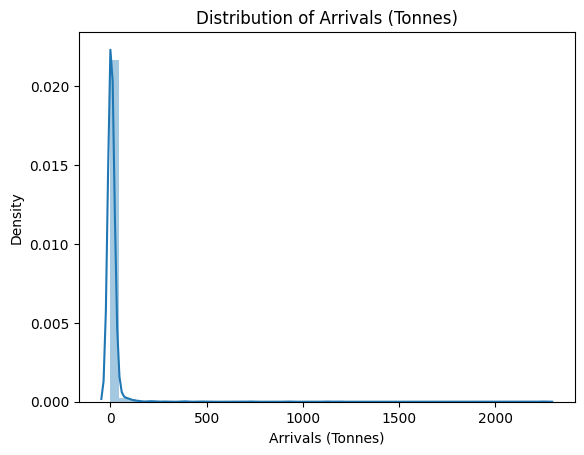

Min Price (Rs./Quintal)


C:\Users\aksha\AppData\Local\Temp\ipykernel_31724\4253890278.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


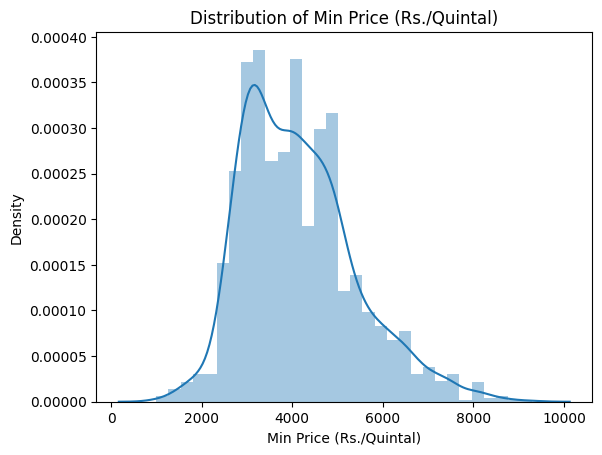

Max Price (Rs./Quintal)


C:\Users\aksha\AppData\Local\Temp\ipykernel_31724\4253890278.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


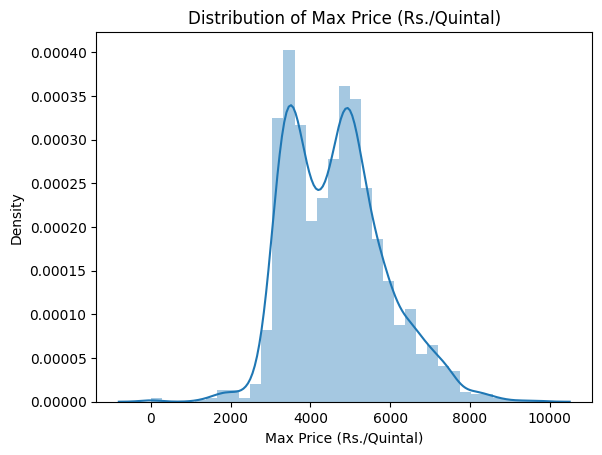

Modal Price (Rs./Quintal)


C:\Users\aksha\AppData\Local\Temp\ipykernel_31724\4253890278.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


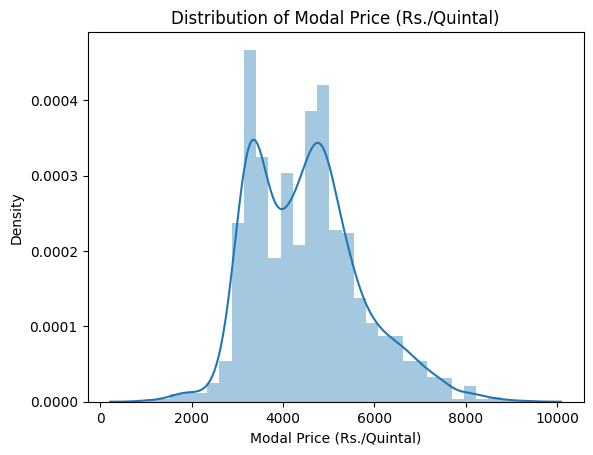

Arrivals (Quintals)


C:\Users\aksha\AppData\Local\Temp\ipykernel_31724\4253890278.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


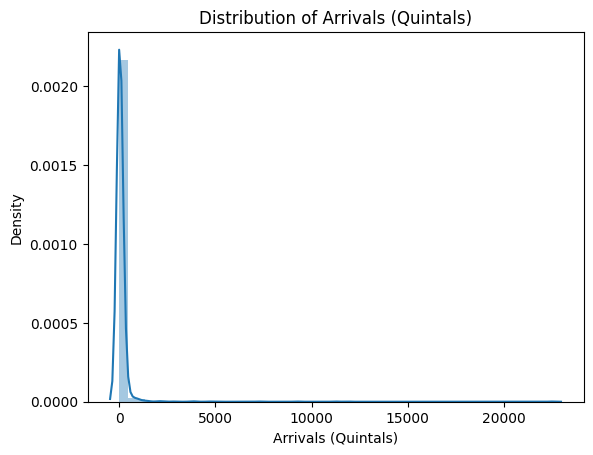

In [85]:
Ahar_Dal_Tur_Dal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 1936 non-null   object        
 1   District Name              1936 non-null   object        
 2   Market Name                1936 non-null   object        
 3   Variety                    1936 non-null   object        
 4   Group                      1936 non-null   object        
 5   Arrivals (Tonnes)          1936 non-null   float64       
 6   Min Price (Rs./Quintal)    1936 non-null   int64         
 7   Max Price (Rs./Quintal)    1936 non-null   int64         
 8   Modal Price (Rs./Quintal)  1936 non-null   float64       
 9   Reported Date              1936 non-null   datetime64[ns]
 10  Arrivals (Quintals)        1936 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1

### Ajwan

In [34]:
#creating object
second=Analysis()
#knowing all the methods
second.all_methods()

['Quintal_conversion_arrivals',
 'Tonnes_conversion',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'all_methods',
 'data_load',
 'date_convertion',
 'drop_state',
 'extract_filenames',
 'load_csv_files',
 'plot_distribution',
 'plot_outlier']

In [98]:
Ajwan=second.data_load('Agmarknet_Price_And_Arrival_Report_Ajwan.csv')
Ajwan.head()

State Name District Name Market Name Variety   Group Arrivals (Tonnes)  \
0  Madhya Pradesh    Ashoknagar  Ashoknagar   Ajwan  Spices               0.1   
1  Madhya Pradesh    Ashoknagar  Ashoknagar   Ajwan  Spices              0.01   
2  Madhya Pradesh    Ashoknagar  Ashoknagar   Ajwan  Spices                15   
3  Madhya Pradesh    Ashoknagar  Ashoknagar   Ajwan  Spices                 2   
4  Madhya Pradesh    Ashoknagar  Ashoknagar   Ajwan  Spices                 5   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                        0                        0   
1                     1640                     2450   
2                     2326                     2326   
3                     5900                     5900   
4                     6711                     7002   

   Modal Price (Rs./Quintal) Reported Date  
0                       2125     03-Sep-23  
1                       1760     16-Apr-20  
2                       2326     16-May-19  
3                       5900     05-Jan-18  
4                       6711     04-Jan-18

In [65]:
Ajwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 2460 non-null   object
 1   District Name              2460 non-null   object
 2   Market Name                2460 non-null   object
 3   Variety                    2460 non-null   object
 4   Group                      2460 non-null   object
 5   Arrivals (Tonnes)          2458 non-null   object
 6   Min Price (Rs./Quintal)    2460 non-null   int64 
 7   Max Price (Rs./Quintal)    2460 non-null   int64 
 8   Modal Price (Rs./Quintal)  2460 non-null   int64 
 9   Reported Date              2460 non-null   object
dtypes: int64(3), object(7)
memory usage: 192.3+ KB


In [100]:
Ajwan=second.drop_state(Ajwan)

In [101]:
Ajwan=second.date_convertion(Ajwan)

In [102]:
Ajwan=second.Tonnes_conversion(Ajwan)

In [103]:
Ajwan=second.Quintal_conversion_arrivals(Ajwan)

In [45]:
Ajwayn.Group.unique()

array(['Spices'], dtype=object)

In [70]:
Ajwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              2460 non-null   object        
 1   Market Name                2460 non-null   object        
 2   Variety                    2460 non-null   object        
 3   Group                      2460 non-null   object        
 4   Arrivals (Tonnes)          2458 non-null   float64       
 5   Min Price (Rs./Quintal)    2460 non-null   int64         
 6   Max Price (Rs./Quintal)    2460 non-null   int64         
 7   Modal Price (Rs./Quintal)  2460 non-null   int64         
 8   Reported Date              2460 non-null   datetime64[ns]
 9   Arrivals (Quintals)        2458 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 192.3+ KB


### Alsande Gram

In [72]:
#creating object
third=Analysis()
third.all_methods()

['Quintal_conversion_arrivals',
 'Tonnes_conversion',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'all_methods',
 'data_load',
 'date_convertion',
 'drop_state',
 'extract_filenames',
 'load_csv_files',
 'plot_distribution',
 'plot_outlier']

In [73]:
Alsande_Gram=third.data_load('Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv')
Alsande_Gram.head()

State Name District Name Market Name        Variety   Group  \
0  Madhya Pradesh         Panna    Ajaygarh  Alasande Gram  Pulses   
1  Madhya Pradesh         Panna    Ajaygarh  Alasande Gram  Pulses   
2  Madhya Pradesh         Panna    Ajaygarh  Alasande Gram  Pulses   
3  Madhya Pradesh         Panna    Ajaygarh  Alasande Gram  Pulses   
4  Madhya Pradesh         Panna    Ajaygarh  Alasande Gram  Pulses   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               8.5                   5800.0                   5850.0   
1               9.9                   5800.0                   5850.0   
2               8.5                   5800.0                   5820.0   
3                10                   5900.0                   6000.0   
4                 7                   5900.0                   6000.0   

   Modal Price (Rs./Quintal) Reported Date  
0                     5820.0     14-Dec-23  
1                     5820.0     13-Dec-23  
2                     5810.0     12-Dec-23  
3                     5950.0     29-Nov-23  
4                     5960.0     28-Nov-23

In [74]:
Alsande_Gram=third.drop_state(Alsande_Gram)
Alsande_Gram=third.date_convertion(Alsande_Gram)
Alsande_Gram=third.Tonnes_conversion(Alsande_Gram)
Alsande_Gram=second.Quintal_conversion_arrivals(Alsande_Gram)

In [75]:
Alsande_Gram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              3377 non-null   object        
 1   Market Name                3377 non-null   object        
 2   Variety                    3377 non-null   object        
 3   Group                      3377 non-null   object        
 4   Arrivals (Tonnes)          3376 non-null   float64       
 5   Min Price (Rs./Quintal)    3377 non-null   float64       
 6   Max Price (Rs./Quintal)    3377 non-null   float64       
 7   Modal Price (Rs./Quintal)  3377 non-null   float64       
 8   Reported Date              3377 non-null   datetime64[ns]
 9   Arrivals (Quintals)        3376 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 264.0+ KB


### Alsandikai

In [76]:
fourth=Analysis()

In [81]:
Alsandikai=fourth.data_load('Agmarknet_Price_And_Arrival_Report_Alsandikai.csv')
Alsandikai.head()

State Name District Name Market Name     Variety       Group  \
0  Madhya Pradesh       Khandwa     Khandwa  Alsandikai  Vegetables   
1  Madhya Pradesh       Khandwa     Khandwa  Alsandikai  Vegetables   
2  Madhya Pradesh       Khandwa     Khandwa  Alsandikai  Vegetables   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0          1,279.00                     1800                     2492   
1               293                     3518                     3756   
2               477                     1100                     1150   

   Modal Price (Rs./Quintal) Reported Date  
0                       2230     19-May-23  
1                       3700     02-Feb-19  
2                       1125     24-Jan-18

In [82]:
Alsandikai=fourth.drop_state(Alsandikai)
Alsandikai=fourth.date_convertion(Alsandikai)
Alsandikai=fourth.Tonnes_conversion(Alsandikai)
Alsandikai=fourth.Quintal_conversion_arrivals(Alsandikai)

In [83]:
Alsandikai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              3 non-null      object        
 1   Market Name                3 non-null      object        
 2   Variety                    3 non-null      object        
 3   Group                      3 non-null      object        
 4   Arrivals (Tonnes)          3 non-null      float64       
 5   Min Price (Rs./Quintal)    3 non-null      int64         
 6   Max Price (Rs./Quintal)    3 non-null      int64         
 7   Modal Price (Rs./Quintal)  3 non-null      int64         
 8   Reported Date              3 non-null      datetime64[ns]
 9   Arrivals (Quintals)        3 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 368.0+ bytes


### Ambada Seed

In [105]:
fifth=Analysis()

In [106]:
Ambada_Seed=fifth.data_load("Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv")
Ambada_Seed.head()

State Name District Name Market Name      Variety            Group  \
0  Madhya Pradesh         Sidhi       Sidhi  Ambada Seed  Forest Products   
1  Madhya Pradesh         Sidhi       Sidhi        Other  Forest Products   
2  Madhya Pradesh      Singroli    Singroli  Ambada Seed  Forest Products   
3  Madhya Pradesh      Singroli    Singroli  Ambada Seed  Forest Products   
4  Madhya Pradesh      Singroli    Singroli        Other  Forest Products   

   Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               75.0                     1500                     1600   
1               28.2                     1500                     1525   
2               20.0                     2000                     2000   
3               20.0                     2000                     2000   
4               22.0                     2500                     2500   

   Modal Price (Rs./Quintal) Reported Date  
0                       1600     03-May-23  
1                       1510     22-Mar-23  
2                       2000     02-Oct-23  
3                       2000     05-Aug-23  
4                       2500     29-Jun-23

In [91]:
Ambada_Seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 8 non-null      object 
 1   District Name              8 non-null      object 
 2   Market Name                8 non-null      object 
 3   Variety                    8 non-null      object 
 4   Group                      8 non-null      object 
 5   Arrivals (Tonnes)          8 non-null      float64
 6   Min Price (Rs./Quintal)    8 non-null      int64  
 7   Max Price (Rs./Quintal)    8 non-null      int64  
 8   Modal Price (Rs./Quintal)  8 non-null      int64  
 9   Reported Date              8 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 768.0+ bytes


In [107]:
Ambada_Seed=fifth.drop_state(Ambada_Seed)
Ambada_Seed=fifth.date_convertion(Ambada_Seed)
Ambada_Seed=fifth.Tonnes_conversion(Ambada_Seed) #The column is already in the format
Ambada_Seed=fifth.Quintal_conversion_arrivals(Ambada_Seed)

### Amla Nelli kai

In [110]:
sixth=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [111]:
Amla_Nelli_kai=sixth.data_load('Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv')
Amla_Nelli_kai.head()

State Name District Name  Market Name Variety   Group  \
0  Madhya Pradesh          Rewa  Baikunthpur    Amla  Fruits   
1  Madhya Pradesh          Rewa  Baikunthpur    Amla  Fruits   
2  Madhya Pradesh          Rewa  Baikunthpur    Amla  Fruits   
3  Madhya Pradesh          Rewa  Baikunthpur    Amla  Fruits   
4  Madhya Pradesh          Rewa  Baikunthpur    Amla  Fruits   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                30                     6845                     6980   
1               250                     2581                     2581   
2             115.8                     2200                     2201   
3              2.34                     2250                     2250   
4               120                     1920                     1930   

   Modal Price (Rs./Quintal) Reported Date  
0                       6980     05-Dec-23  
1                       2581     04-Dec-23  
2                       2201     29-Jul-23  
3                       2250     27-Aug-19  
4                       1930     10-Feb-19

In [112]:
Amla_Nelli_kai=sixth.drop_state(Amla_Nelli_kai)
Amla_Nelli_kai=sixth.date_convertion(Amla_Nelli_kai)
Amla_Nelli_kai=sixth.Tonnes_conversion(Amla_Nelli_kai) #The column is already in the format
Amla_Nelli_kai=sixth.Quintal_conversion_arrivals(Amla_Nelli_kai)

In [113]:
Amla_Nelli_kai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              719 non-null    object        
 1   Market Name                719 non-null    object        
 2   Variety                    719 non-null    object        
 3   Group                      719 non-null    object        
 4   Arrivals (Tonnes)          719 non-null    float64       
 5   Min Price (Rs./Quintal)    719 non-null    int64         
 6   Max Price (Rs./Quintal)    719 non-null    int64         
 7   Modal Price (Rs./Quintal)  719 non-null    int64         
 8   Reported Date              719 non-null    datetime64[ns]
 9   Arrivals (Quintals)        719 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 56.3+ KB


### Amranthus

In [116]:
crop_7=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [117]:
Amranthus=crop_7.data_load('Agmarknet_Price_And_Arrival_Report_Amranthus.csv')
Amranthus.head()

State Name District Name  Market Name Variety       Group  \
0  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Vegetables   
1  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Vegetables   
2  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Vegetables   
3  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Vegetables   
4  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Vegetables   

   Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               80.5                     2000                     3000   
1               66.5                     2000                     3000   
2                4.0                     3000                     5000   
3               80.3                     3000                     4000   
4               51.0                     3000                     4000   

   Modal Price (Rs./Quintal) Reported Date  
0                       2500     01-Nov-19  
1                       2500     24-Sep-19  
2                       4000     12-May-19  
3                       3500     25-Feb-19  
4                       3500     21-Jan-19

In [118]:
Amranthus=crop_7.drop_state(Amranthus)
Amranthus=crop_7.date_convertion(Amranthus)
Amranthus=crop_7.Tonnes_conversion(Amranthus) #The column is already in the format
Amranthus=crop_7.Quintal_conversion_arrivals(Amranthus)

### Antawala

In [119]:
crop_8=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [120]:
Antawala=crop_8.data_load('Agmarknet_Price_And_Arrival_Report_Antawala.csv')
Antawala.head()

State Name District Name Market Name   Variety            Group  \
0  Madhya Pradesh       Shehdol     Beohari  Antawala  Forest Products   
1  Madhya Pradesh       Dindori     Dindori  Antawala  Forest Products   
2  Madhya Pradesh       Dindori     Dindori  Antawala  Forest Products   
3  Madhya Pradesh       Dindori     Dindori  Antawala  Forest Products   
4  Madhya Pradesh       Dindori     Dindori  Antawala  Forest Products   

   Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0              30.00                     2100                     2100   
1               5.95                     5000                     5000   
2               2.56                     5000                     5000   
3               3.00                     5000                     5000   
4               2.50                     6000                     6000   

   Modal Price (Rs./Quintal) Reported Date  
0                       2100     18-Sep-22  
1                       5000     02-Dec-23  
2                       5000     31-Jul-23  
3                       5000     06-Apr-23  
4                       6000     24-Dec-22

In [122]:
Antawala=crop_8.drop_state(Antawala)
Antawala=crop_8.date_convertion(Antawala)
Antawala=crop_8.Tonnes_conversion(Antawala) #The column is already in the format
Antawala=crop_8.Quintal_conversion_arrivals(Antawala)

### Apple

In [123]:
crop_9=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [124]:
Apple=crop_9.data_load('Agmarknet_Price_And_Arrival_Report_Apple.csv')
Apple.head()

State Name District Name  Market Name Variety   Group  \
0  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Fruits   
1  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Fruits   
2  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Fruits   
3  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Fruits   
4  Madhya Pradesh        Bhopal  Bhopal(F&V)   Other  Fruits   

   Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               17.0                     3000                     7000   
1               18.0                     3000                     7000   
2               17.0                     3000                     7000   
3               30.0                     3000                     7000   
4               26.0                     3000                     7000   

   Modal Price (Rs./Quintal) Reported Date  
0                       4000     20-Dec-23  
1                       5000     19-Dec-23  
2                       5000     18-Dec-23  
3                       5000     17-Dec-23  
4                       5000     15-Dec-23

In [125]:
Apple=crop_9.drop_state(Apple)
Apple=crop_9.date_convertion(Apple)
Apple=crop_9.Tonnes_conversion(Apple) #The column is already in the format
Apple=crop_9.Quintal_conversion_arrivals(Apple)

### Apricot_Jardalu_Khumani

In [126]:
crop_10=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [127]:
Apricot_Jardalu_Khumani=crop_10.data_load('Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv')
Apricot_Jardalu_Khumani.head()

State Name District Name               Market Name  \
0    Haryana        Ambala  Ambala City(Subji Mandi)   
1    Haryana        Ambala  Ambala City(Subji Mandi)   
2    Haryana        Ambala  Ambala City(Subji Mandi)   
3    Haryana        Ambala  Ambala City(Subji Mandi)   
4    Haryana        Ambala  Ambala City(Subji Mandi)   

                    Variety   Group Arrivals (Tonnes)  \
0  Apricot(Jardalu/Khumani)  Fruits               0.6   
1  Apricot(Jardalu/Khumani)  Fruits               0.8   
2  Apricot(Jardalu/Khumani)  Fruits               0.8   
3  Apricot(Jardalu/Khumani)  Fruits               0.6   
4  Apricot(Jardalu/Khumani)  Fruits               0.8   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     5270                     6300   
1                     6180                     6695   
2                     4500                     5500   
3                     4000                     5325   
4                     5605                     6980   

   Modal Price (Rs./Quintal) Reported Date  
0                       5800     20-Jun-23  
1                       6300     18-Jun-23  
2                       5000     16-Jun-23  
3                       4790     15-Jun-23  
4                       5710     14-Jun-23

In [128]:
Apricot_Jardalu_Khumani=crop_10.drop_state(Apricot_Jardalu_Khumani)
Apricot_Jardalu_Khumani=crop_10.date_convertion(Apricot_Jardalu_Khumani)
Apricot_Jardalu_Khumani=crop_10.Tonnes_conversion(Apricot_Jardalu_Khumani) #The column is already in the format
Apricot_Jardalu_Khumani=crop_10.Quintal_conversion_arrivals(Apricot_Jardalu_Khumani)

### Bajra_Pearl_Millet_Cumbu

In [129]:
crop_11=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [130]:
Bajra_Pearl_Millet_Cumbu=crop_11.data_load('Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv')
Bajra_Pearl_Millet_Cumbu.head()

State Name District Name Market Name Variety    Group  \
0  Madhya Pradesh         Bhind     Alampur   Other  Cereals   
1  Madhya Pradesh         Bhind     Alampur   Other  Cereals   
2  Madhya Pradesh         Bhind     Alampur   Other  Cereals   
3  Madhya Pradesh         Bhind     Alampur   Other  Cereals   
4  Madhya Pradesh         Bhind     Alampur   Other  Cereals   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                31                     2100                     2300   
1                16                     2000                     2300   
2                 2                     2100                     2300   
3                30                     1900                     2300   
4                30                     2000                     2200   

   Modal Price (Rs./Quintal) Reported Date  
0                       2200     18-Dec-23  
1                       2200     15-Dec-23  
2                       2200     13-Dec-23  
3                       2100     08-Dec-23  
4                       2100     05-Dec-23

In [131]:
Bajra_Pearl_Millet_Cumbu=crop_11.drop_state(Bajra_Pearl_Millet_Cumbu)
Bajra_Pearl_Millet_Cumbu=crop_11.date_convertion(Bajra_Pearl_Millet_Cumbu)
Bajra_Pearl_Millet_Cumbu=crop_11.Tonnes_conversion(Bajra_Pearl_Millet_Cumbu) #The column is already in the format
Bajra_Pearl_Millet_Cumbu=crop_11.Quintal_conversion_arrivals(Bajra_Pearl_Millet_Cumbu)

### Banana_Green

In [133]:
crop_12=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [135]:
Banana_Green=crop_12.data_load('Agmarknet_Price_And_Arrival_Report_Banana Green.csv')
Banana_Green.head()

State Name District Name Market Name      Variety   Group  \
0  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
1  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
2  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
3  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
4  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               0.1                      800                     1600   
1               0.5                     1100                     1435   
2               0.3                     1215                     1505   
3               0.7                     1150                     1465   
4               0.4                     1125                     1360   

   Modal Price (Rs./Quintal) Reported Date  
0                       1200     15-Jul-22  
1                       1200     31-Aug-21  
2                       1400     30-Aug-21  
3                       1340     28-Aug-21  
4                       1235     27-Aug-21

In [136]:
Banana_Green=crop_12.drop_state(Banana_Green)
Banana_Green=crop_12.date_convertion(Banana_Green)
Banana_Green=crop_12.Tonnes_conversion(Banana_Green) #The column is already in the format
Banana_Green=crop_12.Quintal_conversion_arrivals(Banana_Green)

In [137]:
crop_13=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [139]:
Banana=crop_13.data_load('Agmarknet_Price_And_Arrival_Report_Banana.csv')
Banana.head()

State Name District Name Market Name      Variety   Group  \
0  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
1  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
2  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
3  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   
4  Madhya Pradesh      Khargone     Badwaha  Amruthapani  Fruits   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0               0.1                      800                     1600   
1               0.5                     1100                     1435   
2               0.3                     1215                     1505   
3               0.7                     1150                     1465   
4               0.4                     1125                     1360   

   Modal Price (Rs./Quintal) Reported Date  
0                       1200     15-Jul-22  
1                       1200     31-Aug-21  
2                       1400     30-Aug-21  
3                       1340     28-Aug-21  
4                       1235     27-Aug-21

In [140]:
Banana=crop_13.drop_state(Banana)
Banana=crop_13.date_convertion(Banana)
Banana=crop_13.Tonnes_conversion(Banana) #The column is already in the format
Banana=crop_13.Quintal_conversion_arrivals(Banana)

In [141]:
Banana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8884 entries, 0 to 8883
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              8884 non-null   object        
 1   Market Name                8884 non-null   object        
 2   Variety                    8884 non-null   object        
 3   Group                      8884 non-null   object        
 4   Arrivals (Tonnes)          8881 non-null   float64       
 5   Min Price (Rs./Quintal)    8884 non-null   int64         
 6   Max Price (Rs./Quintal)    8884 non-null   int64         
 7   Modal Price (Rs./Quintal)  8884 non-null   int64         
 8   Reported Date              8884 non-null   datetime64[ns]
 9   Arrivals (Quintals)        8881 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 694.2+ KB


### Beans

In [142]:
crop_14=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [143]:
Beans=crop_14.data_load('Agmarknet_Price_And_Arrival_Report_Beans.csv')
Beans.head()

State Name District Name  Market Name        Variety   Group  \
0  Madhya Pradesh    Chhatarpur  Badamalhera  Beans (Whole)  Pulses   
1  Madhya Pradesh    Chhatarpur  Badamalhera  Beans (Whole)  Pulses   
2  Madhya Pradesh    Chhatarpur  Badamalhera  Beans (Whole)  Pulses   
3  Madhya Pradesh    Chhatarpur  Badamalhera  Beans (Whole)  Pulses   
4  Madhya Pradesh    Chhatarpur  Badamalhera  Beans (Whole)  Pulses   

   Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0              203.0                     4850                     5000   
1              627.0                     4804                     5370   
2              301.0                     5400                     5420   
3              307.0                     5370                     5395   
4              306.0                     5335                     5355   

   Modal Price (Rs./Quintal) Reported Date  
0                       5000     05-Aug-22  
1                       5330     10-Jul-22  
2                       5405     02-Jul-22  
3                       5395     29-Jun-22  
4                       5350     24-Jun-22

In [144]:
Beans=crop_14.drop_state(Beans)
Beans=crop_14.date_convertion(Beans)
Beans=crop_14.Tonnes_conversion(Beans) #The column is already in the format
Beans=crop_14.Quintal_conversion_arrivals(Beans)

In [145]:
Beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              1704 non-null   object        
 1   Market Name                1704 non-null   object        
 2   Variety                    1704 non-null   object        
 3   Group                      1704 non-null   object        
 4   Arrivals (Tonnes)          1704 non-null   float64       
 5   Min Price (Rs./Quintal)    1704 non-null   int64         
 6   Max Price (Rs./Quintal)    1704 non-null   int64         
 7   Modal Price (Rs./Quintal)  1704 non-null   int64         
 8   Reported Date              1704 non-null   datetime64[ns]
 9   Arrivals (Quintals)        1704 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 133.2+ KB


### Beaten_Rice

In [146]:
crop_15=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [147]:
Beaten_Rice=crop_15.data_load('Agmarknet_Price_And_Arrival_Report_Beaten Rice.csv')
Beaten_Rice.head()

State Name District Name Market Name Variety    Group  \
0  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
1  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
2  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
3  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
4  Madhya Pradesh     Alirajpur       Jobat   Other  Cereals   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                 3                     1000                     1000   
1               8.2                     1200                     1200   
2                 5                     1400                     1400   
3               3.6                      900                     1000   
4                 5                     1100                     1400   

   Modal Price (Rs./Quintal) Reported Date  
0                       1000     01-May-23  
1                       1200     17-Nov-19  
2                       1400     02-May-19  
3                        950     24-Jun-18  
4                       1200     20-Jul-19

In [148]:
Beaten_Rice=crop_15.drop_state(Beaten_Rice)
Beaten_Rice=crop_15.date_convertion(Beaten_Rice)
Beaten_Rice=crop_15.Tonnes_conversion(Beaten_Rice) #The column is already in the format
Beaten_Rice=crop_15.Quintal_conversion_arrivals(Beaten_Rice)

In [149]:
Beaten_Rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              30 non-null     object        
 1   Market Name                30 non-null     object        
 2   Variety                    30 non-null     object        
 3   Group                      30 non-null     object        
 4   Arrivals (Tonnes)          30 non-null     float64       
 5   Min Price (Rs./Quintal)    30 non-null     int64         
 6   Max Price (Rs./Quintal)    30 non-null     int64         
 7   Modal Price (Rs./Quintal)  30 non-null     int64         
 8   Reported Date              30 non-null     datetime64[ns]
 9   Arrivals (Quintals)        30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.5+ KB


### 

In [150]:
crop_16=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [151]:
Beetroot=crop_16.data_load('Agmarknet_Price_And_Arrival_Report_Beaten Rice.csv')
Beetroot.head()

State Name District Name Market Name Variety    Group  \
0  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
1  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
2  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
3  Madhya Pradesh     Alirajpur   Alirajpur   Other  Cereals   
4  Madhya Pradesh     Alirajpur       Jobat   Other  Cereals   

  Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                 3                     1000                     1000   
1               8.2                     1200                     1200   
2                 5                     1400                     1400   
3               3.6                      900                     1000   
4                 5                     1100                     1400   

   Modal Price (Rs./Quintal) Reported Date  
0                       1000     01-May-23  
1                       1200     17-Nov-19  
2                       1400     02-May-19  
3                        950     24-Jun-18  
4                       1200     20-Jul-19

In [152]:
Beetroot=crop_16.drop_state(Beetroot)
Beetroot=crop_16.date_convertion(Beetroot)
Beetroot=crop_16.Tonnes_conversion(Beetroot) #The column is already in the format
Beetroot=crop_16.Quintal_conversion_arrivals(Beetroot)

### Iteration through entire data and doing intial cleaning

In [197]:
first_clean=Analysis()

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv', 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv', 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv', 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv', 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv', 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv', 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv', 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv', 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv', 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv', 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv', 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv', 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv', 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv', 'Beaten Rice': 'Agmar

In [198]:
first_clean.csv_filename

{'Ahar-Dal-Tur-Dal': 'Agmarknet_Price_And_Arrival_Report_Ahar-Dal-Tur-Dal.csv',
 'Ajwan': 'Agmarknet_Price_And_Arrival_Report_Ajwan.csv',
 'Alsande Gram': 'Agmarknet_Price_And_Arrival_Report_Alsande Gram.csv',
 'Alsandikai': 'Agmarknet_Price_And_Arrival_Report_Alsandikai.csv',
 'Ambada Seed': 'Agmarknet_Price_And_Arrival_Report_Ambada Seed.csv',
 'Amla Nelli kai': 'Agmarknet_Price_And_Arrival_Report_Amla Nelli kai.csv',
 'Amranthus': 'Agmarknet_Price_And_Arrival_Report_Amranthus.csv',
 'Antawala': 'Agmarknet_Price_And_Arrival_Report_Antawala.csv',
 'Apple': 'Agmarknet_Price_And_Arrival_Report_Apple.csv',
 'Apricot Jardalu-Khumani': 'Agmarknet_Price_And_Arrival_Report_Apricot Jardalu-Khumani.csv',
 'Bajra-Pearl Millet-Cumbu': 'Agmarknet_Price_And_Arrival_Report_Bajra-Pearl Millet-Cumbu.csv',
 'Banana Green': 'Agmarknet_Price_And_Arrival_Report_Banana Green.csv',
 'Banana': 'Agmarknet_Price_And_Arrival_Report_Banana.csv',
 'Beans': 'Agmarknet_Price_And_Arrival_Report_Beans.csv',
 'Beaten

In [199]:
count=0
for crop,file in first_clean.csv_filename.items():
    try:
        first_clean.first_cleaning(file)
        count+=1
    except:
        print(f'error occured on crop {crop} in file {file}')
print(f'cleaned {count} files')

cleaned 36 files


In [191]:
import pandas as pd
Ashgourd=pd.read_csv('Agmarknet_Price_Report_Ashgourd.csv',skiprows=[0])
Ashgourd.head()

Sl no. District Name Market Name Commodity   Variety Grade  \
0       1        Morena  Porsa(F&V)  Ashgourd  Ashgourd   FAQ   
1       2        Morena   Sabalgarh  Ashgourd  Ashgourd   FAQ   
2       3        Morena   Sabalgarh  Ashgourd  Ashgourd   FAQ   
3       4        Morena   Sabalgarh  Ashgourd  Ashgourd   FAQ   
4       5        Morena   Sabalgarh  Ashgourd  Ashgourd   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1500                     1500   
1                      250                      250   
2                      200                      250   
3                      250                      250   
4                      250                      250   

   Modal Price (Rs./Quintal) Price Date  
0                       1500  19-Sep-20  
1                        250  19-Jan-23  
2                        225  14-Jan-23  
3                        250  11-Jan-23  
4                        250  10-Jan-23

In [192]:
Ashgourd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl no.                     42 non-null     int64 
 1   District Name              42 non-null     object
 2   Market Name                42 non-null     object
 3   Commodity                  42 non-null     object
 4   Variety                    42 non-null     object
 5   Grade                      42 non-null     object
 6   Min Price (Rs./Quintal)    42 non-null     int64 
 7   Max Price (Rs./Quintal)    42 non-null     int64 
 8   Modal Price (Rs./Quintal)  42 non-null     int64 
 9   Price Date                 42 non-null     object
dtypes: int64(4), object(6)
memory usage: 3.4+ KB
